<h2> Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import io

In [2]:
h1b_df = pd.read_csv("h1b_df.csv")

c:\users\rohith ram\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
h1b_df.dropna(inplace = True)

In [4]:
h1b_df.drop("Unnamed: 0", axis = 1, inplace=True)

In [5]:
h1b_df

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,REFILE,EMPLOYER_NAME,EMPLOYER_STATE,PW_SOC_TITLE,PW_LEVEL_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,JOB_INFO_JOB_TITLE,JOB_INFO_EDUCATION,JOB_INFO_EXPERIENCE,JOB_INFO_EXPERIENCE_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,Year
0,A-16270-56093,2017-01-03,Denied,N,Union General Hospital,GA,Medical and Clinical Laboratory Technologists,Level I,19.84,Hour,Medical Technologist,Bachelor's,Y,36.0,PHILIPPINES,H-1B,2017
1,A-16281-60165,2017-01-03,Denied,N,TYCO ELECTRONICS CORPORATION,PA,Computer Systems Analysts,Level III,"94,598.00",Year,IT Auditor,Bachelor's,Y,24.0,INDIA,H-1B,2017
4,A-15265-20526,2017-01-03,Denied,N,CLOUD SHERPAS INC.,GA,Computer Systems Analysts,Level IV,"100,422.00",Year,Senior Technical Consultant,Bachelor's,Y,60.0,INDIA,H-1B,2017
5,A-16159-19070,2017-01-03,Denied,N,Foundation for Orthopaedic Research & Edu,FL,Industrial Engineers,Level I,"47,611.00",Year,Industrial/Process Engineer,Bachelor's,Y,12.0,SLOVAKIA,H-1B,2017
6,A-16124-04926,2017-01-03,Denied,N,Hyde Leadership Charter School,NY,"Elementary School Teachers, Except Special Edu...",Level I,"51,020.00",Year,Elementary School Teacher,Bachelor's,Y,24.0,CANADA,H-1B,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197811,A-21111-76744,2021-09-30,Certified,N,VERINON TECHNOLOGY SOLUTIONS LIMITED,IL,Data Warehousing Specialists,Level III,95555.0,Year,Data Warehouse Engineer,Master's,Y,24.0,INDIA,H-1B,2021
197814,A-21113-77525,2021-09-30,Certified,N,VEN SOLUTIONS LLC,TX,"Software Developers, Applications",Level II,93558.0,Year,Software Developer / Analyst,Master's,Y,6.0,INDIA,H-1B,2021
197815,A-21117-78997,2021-09-30,Certified,N,VEONEER US INC,MI,"Software Developers, Systems Software",Level III,95160.0,Year,Lead Software Engineer,Master's,Y,36.0,INDIA,H-1B,2021
197816,A-21117-79089,2021-09-30,Certified,N,Vayyusoft LLC,PA,Software Developer,Level IV,143936.0,Year,Software Developer,Bachelor's,Y,60.0,INDIA,H-1B,2021


In [6]:
h1b_df.drop("CASE_NUMBER", axis = 1, inplace=True)
h1b_df.drop("DECISION_DATE", axis = 1, inplace=True)

In [7]:
h1b_df

,CASE_STATUS,REFILE,EMPLOYER_NAME,EMPLOYER_STATE,PW_SOC_TITLE,PW_LEVEL_9089,PW_AMOUNT_9089,PW_UNIT_OF_PAY_9089,JOB_INFO_JOB_TITLE,JOB_INFO_EDUCATION,JOB_INFO_EXPERIENCE,JOB_INFO_EXPERIENCE_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,Year
0,Denied,N,Union General Hospital,GA,Medical and Clinical Laboratory Technologists,Level I,19.84,Hour,Medical Technologist,Bachelor's,Y,36.0,PHILIPPINES,H-1B,2017
1,Denied,N,TYCO ELECTRONICS CORPORATION,PA,Computer Systems Analysts,Level III,"94,598.00",Year,IT Auditor,Bachelor's,Y,24.0,INDIA,H-1B,2017
4,Denied,N,CLOUD SHERPAS INC.,GA,Computer Systems Analysts,Level IV,"100,422.00",Year,Senior Technical Consultant,Bachelor's,Y,60.0,INDIA,H-1B,2017
5,Denied,N,Foundation for Orthopaedic Research & Edu,FL,Industrial Engineers,Level I,"47,611.00",Year,Industrial/Process Engineer,Bachelor's,Y,12.0,SLOVAKIA,H-1B,2017
6,Denied,N,Hyde Leadership Charter School,NY,"Elementary School Teachers, Except Special Edu...",Level I,"51,020.00",Year,Elementary School Teacher,Bachelor's,Y,24.0,CANADA,H-1B,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197811,Certified,N,VERINON TECHNOLOGY SOLUTIONS LIMITED,IL,Data Warehousing Specialists,Level III,95555.0,Year,Data Warehouse Engineer,Master's,Y,24.0,INDIA,H-1B,2021
197814,Certified,N,VEN SOLUTIONS LLC,TX,"Software Developers, Applications",Level II,93558.0,Year,Software Developer / Analyst,Master's,Y,6.0,INDIA,H-1B,2021
197815,Certified,N,VEONEER US INC,MI,"Software Developers, Systems Software",Level III,95160.0,Year,Lead Software Engineer,Master's,Y,36.0,INDIA,H-1B,2021
197816,Certified,N,Vayyusoft LLC,PA,Software Developer,Level IV,143936.0,Year,Software Developer,Bachelor's,Y,60.0,INDIA,H-1B,2021


<h2> Indexing Categorical variables to integers 

In [8]:
for i in range(0,len(h1b_df.columns)):
    str1 = ""
    if(i==6 or i==11 or i==14):
        continue
    data1 = h1b_df[h1b_df.columns[i]].astype('category')
    str1 = h1b_df.columns[i] + "_I"
    h1b_df[str1]=data1.cat.codes

    

In [9]:
h1b_df.drop(labels=["CASE_STATUS", "REFILE","EMPLOYER_NAME","EMPLOYER_STATE","PW_SOC_TITLE","PW_LEVEL_9089","PW_UNIT_OF_PAY_9089","JOB_INFO_EDUCATION","JOB_INFO_EXPERIENCE","COUNTRY_OF_CITIZENSHIP","CLASS_OF_ADMISSION","JOB_INFO_JOB_TITLE"], axis=1, inplace=True)

In [10]:
h1b_df

,PW_AMOUNT_9089,JOB_INFO_EXPERIENCE_NUM_MONTHS,Year,CASE_STATUS_I,REFILE_I,EMPLOYER_NAME_I,EMPLOYER_STATE_I,PW_SOC_TITLE_I,PW_LEVEL_9089_I,PW_UNIT_OF_PAY_9089_I,JOB_INFO_JOB_TITLE_I,JOB_INFO_EDUCATION_I,JOB_INFO_EXPERIENCE_I,COUNTRY_OF_CITIZENSHIP_I,CLASS_OF_ADMISSION_I
0,19.84,36.0,2017,1,0,14417,74,1125,0,0,10332,1,1,111,0
1,"94,598.00",24.0,2017,1,0,13854,227,429,2,2,7587,1,1,65,0
4,"100,422.00",60.0,2017,1,0,2667,74,429,3,2,17737,1,1,65,0
5,"47,611.00",12.0,2017,1,0,5262,64,879,0,2,7970,1,1,125,0
6,"51,020.00",24.0,2017,1,0,6416,212,651,0,2,5864,1,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197811,95555.0,24.0,2021,0,0,14562,90,527,2,2,4619,4,1,65,0
197814,93558.0,6.0,2021,0,0,14530,274,1767,1,2,18211,4,1,65,0
197815,95160.0,36.0,2021,0,0,14551,130,1780,2,2,8889,4,1,65,0
197816,143936.0,60.0,2021,0,0,14788,227,1718,3,2,18129,1,1,65,0


In [11]:
h1b_df.dtypes

PW_AMOUNT_9089                     object
JOB_INFO_EXPERIENCE_NUM_MONTHS    float64
Year                                int64
CASE_STATUS_I                        int8
REFILE_I                             int8
EMPLOYER_NAME_I                     int16
EMPLOYER_STATE_I                    int16
PW_SOC_TITLE_I                      int16
PW_LEVEL_9089_I                      int8
PW_UNIT_OF_PAY_9089_I                int8
JOB_INFO_JOB_TITLE_I                int16
JOB_INFO_EDUCATION_I                 int8
JOB_INFO_EXPERIENCE_I                int8
COUNTRY_OF_CITIZENSHIP_I            int16
CLASS_OF_ADMISSION_I                 int8
dtype: object

<b>Salary column as characters like ",". Hence, eliminating the characters and converting the salary column from object to float type.

In [12]:
h1b_df["PW_AMOUNT_9089"] = h1b_df["PW_AMOUNT_9089"].replace(',','', regex=True)
h1b_df["PW_AMOUNT_9089"] = h1b_df.PW_AMOUNT_9089.astype(float)

In [13]:
h1b_df.dtypes

PW_AMOUNT_9089                    float64
JOB_INFO_EXPERIENCE_NUM_MONTHS    float64
Year                                int64
CASE_STATUS_I                        int8
REFILE_I                             int8
EMPLOYER_NAME_I                     int16
EMPLOYER_STATE_I                    int16
PW_SOC_TITLE_I                      int16
PW_LEVEL_9089_I                      int8
PW_UNIT_OF_PAY_9089_I                int8
JOB_INFO_JOB_TITLE_I                int16
JOB_INFO_EDUCATION_I                 int8
JOB_INFO_EXPERIENCE_I                int8
COUNTRY_OF_CITIZENSHIP_I            int16
CLASS_OF_ADMISSION_I                 int8
dtype: object

<b>Eliminating unnecessary columns

In [14]:
h1b_df.drop(["Year","REFILE_I","PW_UNIT_OF_PAY_9089_I","CLASS_OF_ADMISSION_I","PW_SOC_TITLE_I","JOB_INFO_EXPERIENCE_I"],axis=1,inplace=True)

In [15]:
h1b_df

,PW_AMOUNT_9089,JOB_INFO_EXPERIENCE_NUM_MONTHS,CASE_STATUS_I,EMPLOYER_NAME_I,EMPLOYER_STATE_I,PW_LEVEL_9089_I,JOB_INFO_JOB_TITLE_I,JOB_INFO_EDUCATION_I,COUNTRY_OF_CITIZENSHIP_I
0,19.84,36.0,1,14417,74,0,10332,1,111
1,94598.00,24.0,1,13854,227,2,7587,1,65
4,100422.00,60.0,1,2667,74,3,17737,1,65
5,47611.00,12.0,1,5262,64,0,7970,1,125
6,51020.00,24.0,1,6416,212,0,5864,1,30
...,...,...,...,...,...,...,...,...,...
197811,95555.00,24.0,0,14562,90,2,4619,4,65
197814,93558.00,6.0,0,14530,274,1,18211,4,65
197815,95160.00,36.0,0,14551,130,2,8889,4,65
197816,143936.00,60.0,0,14788,227,3,18129,1,65


<h2> Finding Pearson correlation

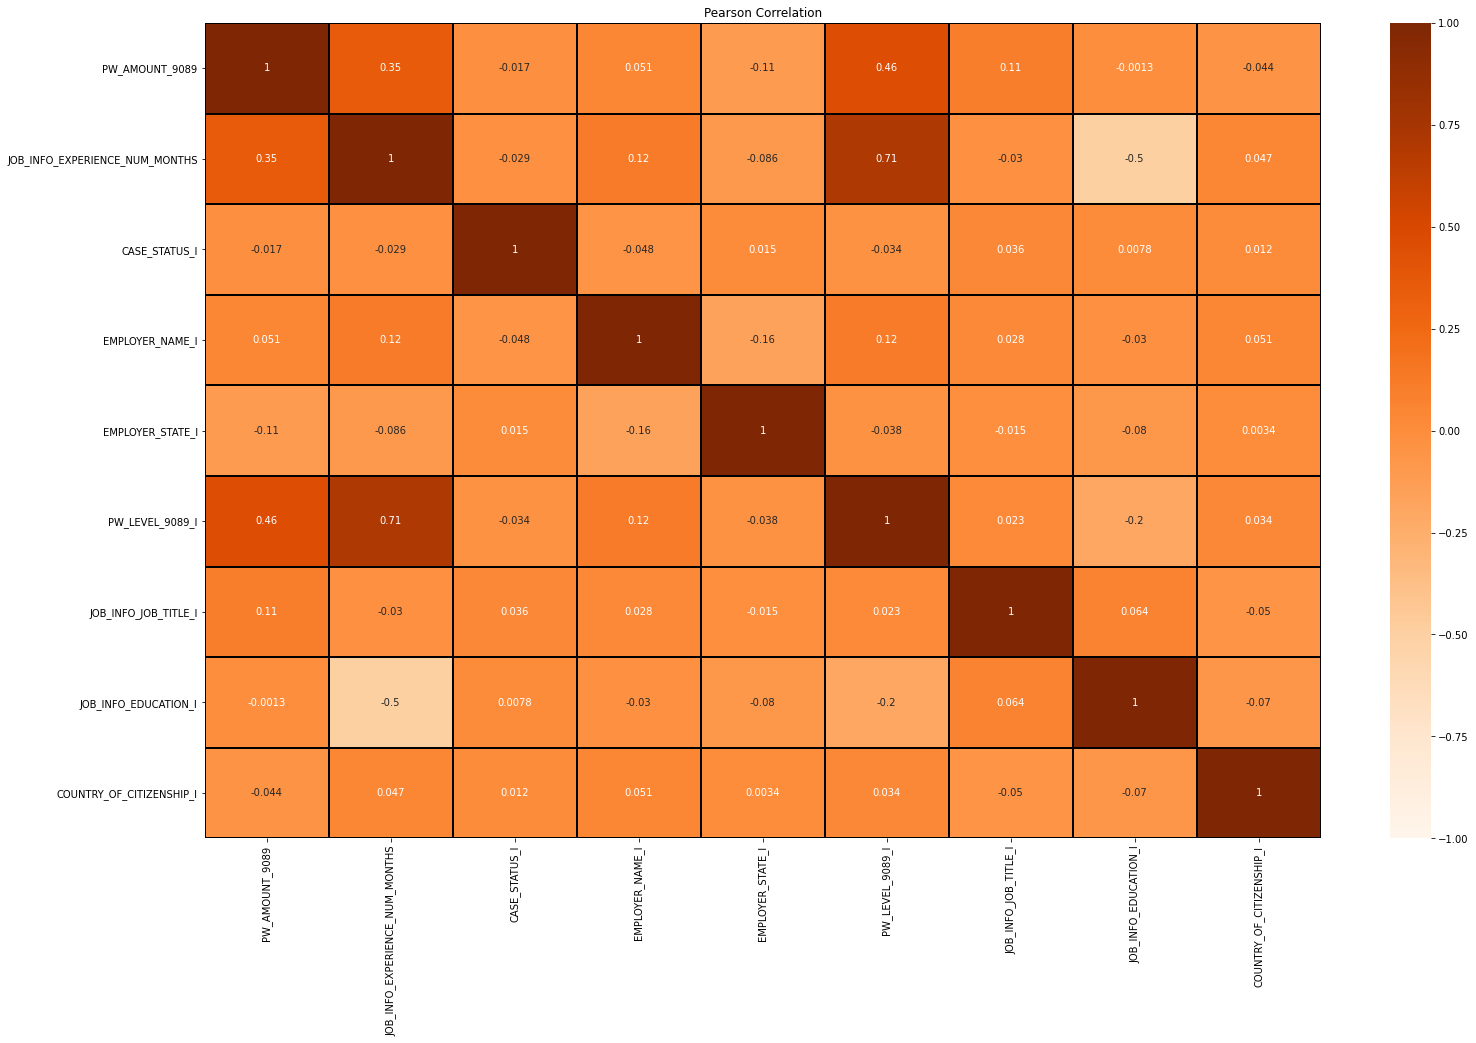

In [16]:
corr_Pearson = h1b_df.corr(method='pearson')

figure = plt.figure(figsize=(25,15))
sns.heatmap(corr_Pearson,vmin=-1,vmax=+1,cmap='Oranges',annot=True, 
            linewidths=2,linecolor = 'black')
plt.title('Pearson Correlation')
plt.show()

The target variable case status is positively correlated with attributes such as Annual Income while negatively correlated with Experience and Level. It can be understood from the plot that the chance of H1B approval decrease as the years pass by since there are only 3 chances (3 years)

<h2> Train Test Split

In [17]:
data_y = h1b_df['CASE_STATUS_I']
data_x = h1b_df.drop(labels=['CASE_STATUS_I'], axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size = 0.3, random_state = 102,shuffle = True)

<h2>Using Standard Scalar

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

<h2>Linear Discriminant Analysis

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import RepeatedStratifiedKFold
model = LinearDiscriminantAnalysis()
model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [20]:
y_pred=model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[21274,     0],
       [ 4975,     0]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8104689702464856


<b>Accuracy score for LDA is 81.05%

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     21274
           1       0.00      0.00      0.00      4975

    accuracy                           0.81     26249
   macro avg       0.41      0.50      0.45     26249
weighted avg       0.66      0.81      0.73     26249



c:\users\rohith ram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rohith ram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rohith ram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

<h2> Gaussian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [24]:
y_pred=gb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [25]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[20825,   449],
       [ 4860,   115]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.7977446759876566


<b>Accuracy score for Gaussian NB is 79.77%

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     21274
           1       0.20      0.02      0.04      4975

    accuracy                           0.80     26249
   macro avg       0.51      0.50      0.46     26249
weighted avg       0.70      0.80      0.73     26249



<h2> KNeighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

<b>Implementing Grid Search

In [38]:
# vals=[]
# neigh=[]
# for i in range(3,10):
#     neigh.append(i)
#     classifier = KNeighborsClassifier(n_neighbors = i, p =2, metric="euclidean")
#     classifier.fit(x_train,y_train)
#     y_pred = classifier.predict(x_test)
#     vals.append(accuracy_score(y_test,y_pred))
# plt.plot(neigh,vals)
# avg_acc=sum(vals)/len(vals)

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 5, p =2, metric="euclidean")
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

[0 0 0 ... 0 0 0]


array([[20110,  1164],
       [ 3902,  1073]], dtype=int64)

In [30]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8070021715112957


<b>Accuracy score for KNeighbors Classifier is 80.70%

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     21274
           1       0.48      0.22      0.30      4975

    accuracy                           0.81     26249
   macro avg       0.66      0.58      0.59     26249
weighted avg       0.77      0.81      0.78     26249



<h2> Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=50)

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)


In [33]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8294030248771381


<b>Accuracy score for Random Forest Classifier is 82.91% 

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     21274
           1       0.62      0.25      0.36      4975

    accuracy                           0.83     26249
   macro avg       0.73      0.61      0.63     26249
weighted avg       0.80      0.83      0.80     26249



<h2> SVM

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8104689702464856


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     21274
           1       0.00      0.00      0.00      4975

    accuracy                           0.81     26249
   macro avg       0.41      0.50      0.45     26249
weighted avg       0.66      0.81      0.73     26249



c:\users\rohith ram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rohith ram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rohith ram\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_